In [0]:
from tensorflow import keras
import tensorflow as tf

# LeNet

In [4]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='tanh', input_shape=(32, 32, 3)))
model.add(keras.layers.AveragePooling2D())

model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='tanh'))
model.add(keras.layers.AveragePooling2D())

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=120, activation='tanh'))
model.add(keras.layers.Dense(units=84, activation='tanh'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 6)         168       
_________________________________________________________________
average_pooling2d_2 (Average (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_3 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               69240     
_________________________________________________________________
dense_3 (Dense)              (None, 84)               

# AlexNet

In [21]:
def build_model(input_shape, num_classes):
    model = keras.models.Sequential([
        keras.layers.Conv2D(filters=96, kernel_size=(11, 11), strides=4, activation='relu',
                      input_shape=input_shape, bias_initializer=tf.initializers.zeros(),
                      kernel_initializer=tf.initializers.RandomNormal(mean=0, stddev=0.01)),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(filters=256, kernel_size=(5, 5), activation='relu', bias_initializer=tf.initializers.ones(),
                      kernel_initializer=tf.initializers.RandomNormal(mean=0, stddev=0.01)),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(filters=384, kernel_size=(3, 3), activation='relu', bias_initializer=tf.initializers.zeros(),
                      kernel_initializer=tf.initializers.RandomNormal(mean=0, stddev=0.01)),
        keras.layers.Conv2D(filters=384, kernel_size=(3, 3), activation='relu', bias_initializer=tf.initializers.ones(),
                      kernel_initializer=tf.initializers.RandomNormal(mean=0, stddev=0.01)),
        keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', bias_initializer=tf.initializers.ones(),
                      kernel_initializer=tf.initializers.RandomNormal(mean=0, stddev=0.01)),
        keras.layers.MaxPooling2D(),
        keras.layers.Dense(4096, activation='relu', bias_initializer=tf.initializers.ones(),
                     kernel_initializer=tf.initializers.RandomNormal(mean=0, stddev=0.01)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(4096, activation='relu', bias_initializer=tf.initializers.ones(),
                     kernel_initializer=tf.initializers.RandomNormal(mean=0, stddev=0.01)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation='softmax', bias_initializer=tf.initializers.ones())
    ])

    return model

model = build_model((227, 227, 3), 1000)   
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization_6 (Batch (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 23, 23, 256)       614656    
_________________________________________________________________
batch_normalization_7 (Batch (None, 23, 23, 256)       1024      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 11, 11, 256)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 9, 9, 384)        

# VGG16

In [22]:
model = keras.applications.VGG16(include_top=True, weights="imagenet")
model.summary()

553467904/553467096 [==============================] - 8s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

# InceptionV3

In [23]:
model = keras.applications.InceptionV3(include_top=True, weights="imagenet")
model.summary()

96116736/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_8 (BatchNor (None, 149, 149, 32) 96          conv2d_24[0][0]                  
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization_8[0][0]      
______________________

# ResNet50

In [24]:
model = keras.applications.ResNet50(include_top=True, weights="imagenet")
model.summary()

102973440/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

# Classify ImageNet classes with ResNet50 

In [26]:
!wget https://static.scientificamerican.com/sciam/cache/file/92E141F8-36E4-4331-BB2EE42AC8674DD3_source.jpg

--2020-05-28 05:03:08--  https://static.scientificamerican.com/sciam/cache/file/92E141F8-36E4-4331-BB2EE42AC8674DD3_source.jpg
Resolving static.scientificamerican.com (static.scientificamerican.com)... 151.101.2.49, 151.101.66.49, 151.101.130.49, ...
Connecting to static.scientificamerican.com (static.scientificamerican.com)|151.101.2.49|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 292933 (286K) [image/jpeg]
Saving to: ‘92E141F8-36E4-4331-BB2EE42AC8674DD3_source.jpg’

92E141F8-36E4-4331- 100%[===================>] 286.07K  --.-KB/s    in 0.02s   

2020-05-28 05:03:08 (17.9 MB/s) - ‘92E141F8-36E4-4331-BB2EE42AC8674DD3_source.jpg’ saved [292933/292933]



In [0]:
!mv /content/92E141F8-36E4-4331-BB2EE42AC8674DD3_source.jpg image.jpg

In [31]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'image.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02123045', 'tabby', 0.4881108), ('n02124075', 'Egyptian_cat', 0.33276743), ('n02123159', 'tiger_cat', 0.055317137)]


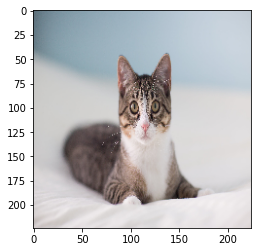

In [29]:
import matplotlib.pyplot as plt

plt.imshow(img)